In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
oecd_bli = pd.read_csv("data/oecd_bli_2015.csv", thousands=',')
oecd_bli.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [3]:
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1')
gdp_per_capita.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [83]:
def prepare_country_stats(oecd_bli, gdp_per_capita, all=True):
    oecd_bli = oecd_bli.copy()
    gdp_per_capita = gdp_per_capita.copy()
    
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    if not all:  
        remove_indices = [0, 1, 6, 8, 33, 34, 35]
        keep_indices = list(set(range(36)) - set(remove_indices))
        return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita, False)

country_stats.head(2)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6


In [84]:
X = country_stats[["GDP per capita"]]
y = country_stats["Life satisfaction"]

## CHART

Text(0.5, 1.0, 'Scatter Plot')

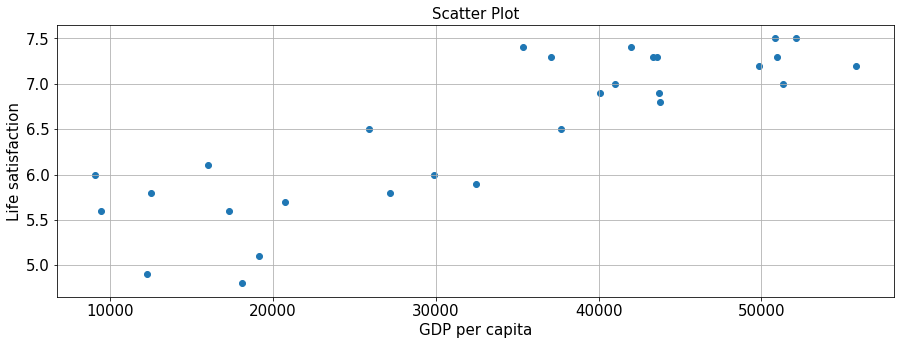

In [107]:
FONT_SIZE=15
x = country_stats[['GDP per capita']]
y = country_stats[['Life satisfaction']]

plt.figure(figsize=(15,5))
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(True)

plt.scatter(x, y)
plt.xlabel("GDP per capita", fontsize=FONT_SIZE)
plt.ylabel("Life satisfaction", fontsize=FONT_SIZE)
plt.title("Scatter Plot", fontsize=FONT_SIZE)


## TRAIN TEST SPLIT


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

 ## MODEL - LINEAR REGRESSION

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.3077003666233977

## PREDICTION

In [92]:
X_new = [[22587]]
model.predict(X_new)

array([[5.64]])

## MODEL - KNEIGHBORS REGRESSION

In [109]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test,y_test)

-0.3307142857142844

## PREDICTION

In [108]:
X_new = [[22587]]
model.predict(X_new)

array([[5.93102315]])